In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Computation':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Computation')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/2346635964.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/1951455018.py:42: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Log Likelihood for 500 Observations with $(\mu_1,\mu_2)=(0,3.1)$')
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/1951455018.py:43: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu_1$')
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/1951455018.py:44: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu_2$')


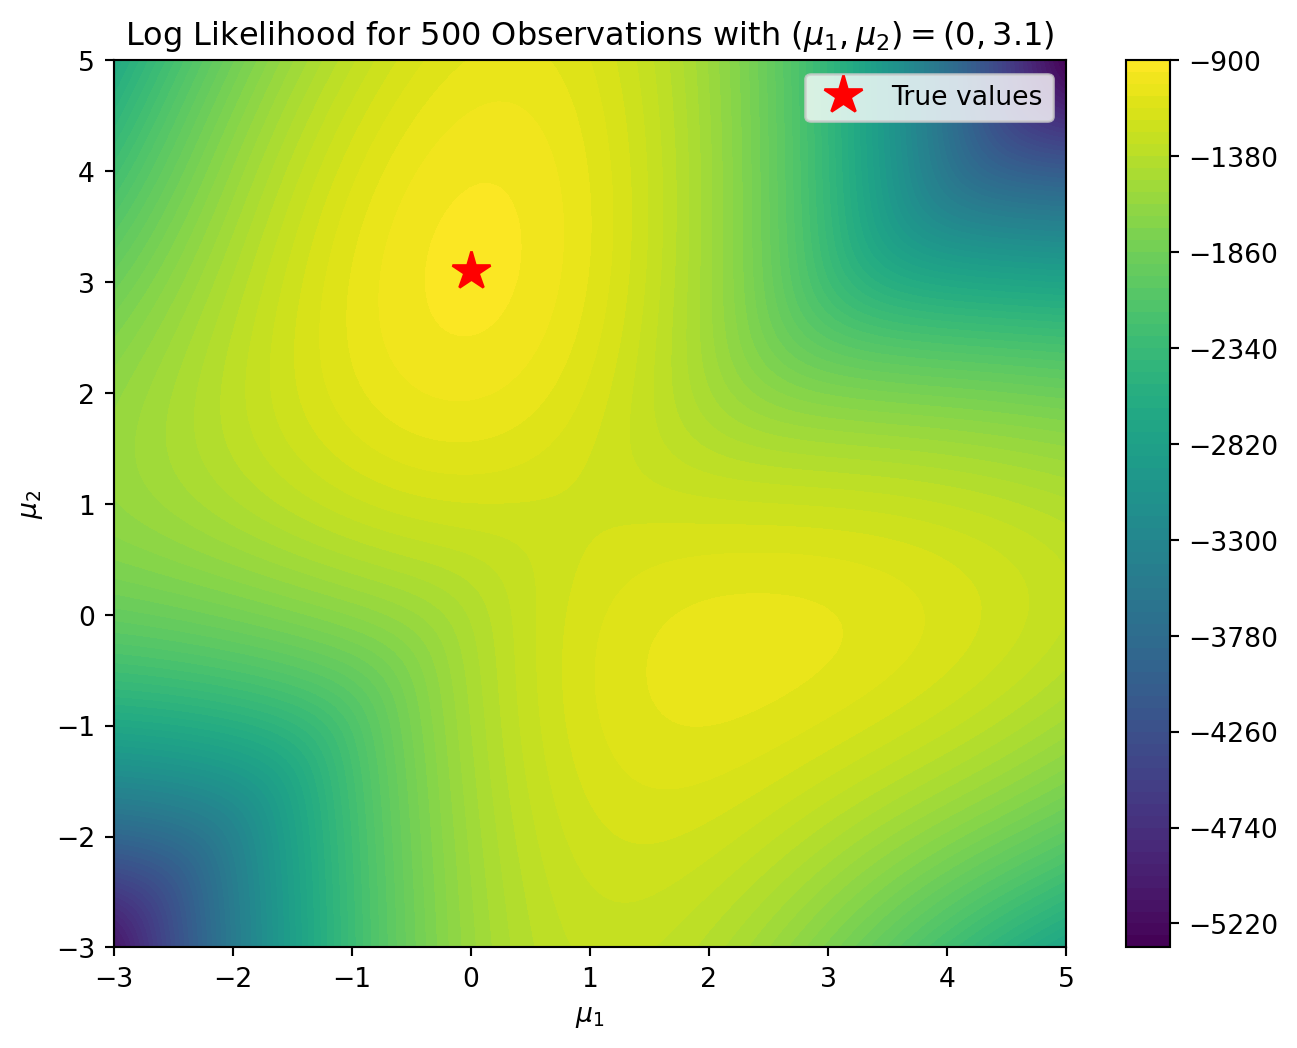

In [2]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# パラメータ
p = 0.7
sigma = 1
mu1_true = 0
mu2_true = 3.1
n_samples = 500

# 観測データの生成
np.random.seed(42)  # 結果の再現性のため
samples = np.concatenate([
    np.random.normal(mu1_true, sigma, int(p * n_samples)),
    np.random.normal(mu2_true, sigma, n_samples - int(p * n_samples))
])

# ガウス混合分布のPDF
def gaussian_mixture_pdf(x, mu1, mu2, sigma):
    return p * norm.pdf(x, mu1, sigma) + (1 - p) * norm.pdf(x, mu2, sigma)

# 対数尤度関数
def log_likelihood(samples, mu1, mu2, sigma):
    return np.sum(np.log(gaussian_mixture_pdf(samples, mu1, mu2, sigma)))

# mu1とmu2の範囲
mu1_grid_values = np.linspace(-3, 5, 100)
mu2_grid_values = np.linspace(-3, 5, 100)
mu1_grid, mu2_grid = np.meshgrid(mu1_grid_values, mu2_grid_values)

# 対数尤度の計算
log_likelihood_grid = np.zeros(mu1_grid.shape)
for i in range(mu1_grid.shape[0]):
    for j in range(mu1_grid.shape[1]):
        log_likelihood_grid[i, j] = log_likelihood(samples, mu1_grid[i, j], mu2_grid[i, j], sigma)

# ヒートマップとして対数尤度をプロット
plt.figure(figsize=(8, 6))
contour = plt.contourf(mu1_grid, mu2_grid, log_likelihood_grid, levels=75, cmap='viridis')
plt.colorbar(contour)
plt.title('Log Likelihood for 500 Observations with $(\mu_1,\mu_2)=(0,3.1)$')
plt.xlabel('$\mu_1$')
plt.ylabel('$\mu_2$')
plt.plot(mu1_true, mu2_true, 'r*', markersize=15, label='True values')
plt.legend()
plt.show()

In [3]:
class EM_1d:
    """
    Gauss 有限混合モデルに対する EM アルゴリズム

    Parameters:
    - K (int): 混合成分の数．デフォルトは2．
    - max_iter (int): アルゴリズムの最大反復回数．デフォルトは100．
    - tol (float): 収束の閾値．連続する反復での対数尤度の差がこの値以下になった場合，アルゴリズムは収束したと見なされる．デフォルトは1e-4．
    """

    def __init__(self, K=2, init=None, max_iter=100, tol=1e-4):
        self.K = K
        self.max_iter = max_iter
        self.tol = tol

        self.means = None
        self.variances = None
        self.mixing_coefficients = None
        self.log_likelihood_history = []
        self.mean_history = []
        self.initial_value = init

    def expectation(self, X):
        """
        E ステップ

        Parameters:
        - X (ndarray): 観測データ．
        """
        N = X.shape[0]
        r = np.zeros((N, self.K))
        for k in range(self.K):
            pdf = norm.pdf(X, self.means[k], np.sqrt(self.variances[k]))
            r[:, k] = self.mixing_coefficients[k] * pdf
        r /= r.sum(axis=1, keepdims=True)
        return r

    def maximization(self, X, r):
        """
        M ステップ

        Parameters:
        - X (ndarray): 観測データ．
        - r (ndarray): 負担率．
        """
        N = X.shape[0]
        Nk = r.sum(axis=0)
        self.means = (X.T @ r / Nk).T
        self.variances = np.zeros(self.K)
        for k in range(self.K):
            diff = X - self.means[k]
            self.variances[k] = (r[:, k] @ (diff ** 2)) / Nk[k]
        self.mixing_coefficients = Nk / N

    def compute_log_likelihood(self, X):
        """
        対数尤度の計算

        Parameters:
        - X (ndarray): 観測データ．
        """
        log_likelihood = 0
        for x in X:
            log_likelihood += np.log(np.sum([self.mixing_coefficients[k] * norm.pdf(x, self.means[k], np.sqrt(self.variances[k])) for k in range(self.K)]))
        return log_likelihood
    
    def fit(self, X):
        """
        EM アルゴリズムの実行

        Parameters:
        - X (ndarray): 観測データ．
        """
        N = X.shape[0]
        np.random.seed(42)

        if self.initial_value is None:
            random_indeces = np.random.choice(N, self.K, replace=False)
            self.initial_value = X[random_indeces]
        self.means = self.initial_value
        self.initial_value = self.means
        self.variances = np.ones(self.K)
        self.mixing_coefficients = np.ones(self.K) / self.K

        # 反復
        for _ in range(self.max_iter):
            r = self.expectation(X)
            self.maximization(X, r)
            log_likelihood = self.compute_log_likelihood(X)
            self.log_likelihood_history.append(log_likelihood)
            self.mean_history.append(self.means)

            if len(self.log_likelihood_history) >= 2 and np.abs(self.log_likelihood_history[-1] - self.log_likelihood_history[-2]) < self.tol:
                break
        
        return self

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/163584773.py:32: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_title('Mean Values Progress ($\mu_1,\mu_2$)')
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/163584773.py:33: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_xlabel('$\mu_1$')
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_12294/163584773.py:34: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_ylabel('$\mu_2$')


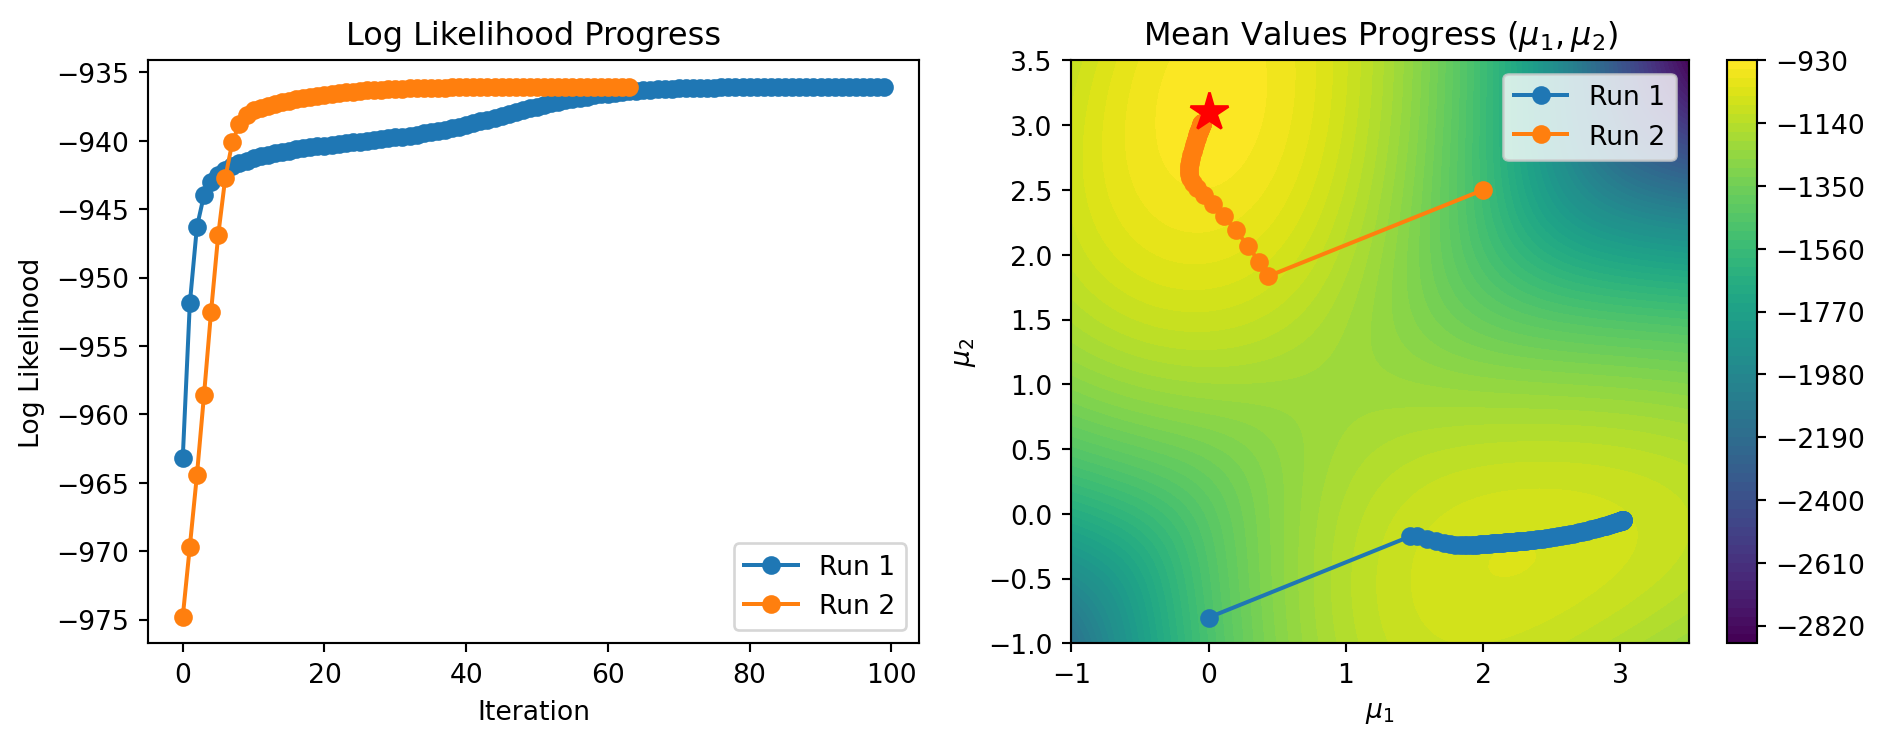

In [4]:
#| echo: false
import matplotlib.pyplot as plt

initial_values = np.array([0,-0.8])
em = EM_1d(K=2, init=initial_values)
em.fit(samples)
em.mean_history.insert(0,em.initial_value)

initial_values = np.array([2,2.5])
em2 = EM_1d(K=2, init=initial_values)
em2.fit(samples)
em2.mean_history.insert(0,em2.initial_value)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# 対数尤度の推移をプロット
axs[0].plot(em.log_likelihood_history, '-o', label='Run 1')
axs[0].plot(em2.log_likelihood_history, '-o', label='Run 2')
axs[0].set_title('Log Likelihood Progress')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Log Likelihood')
axs[0].legend()

# (mu1, mu2) の推移をプロット
# em.mean_history から mu1 と mu2 の値を抽出
mu1_values = [means[0] for means in em.mean_history]
mu2_values = [means[1] for means in em.mean_history]
mu1_values2 = [means[0] for means in em2.mean_history]
mu2_values2 = [means[1] for means in em2.mean_history]

axs[1].plot(mu1_values, mu2_values, '-o', label='Run 1')
axs[1].plot(mu1_values2, mu2_values2, '-o', label='Run 2')
axs[1].set_title('Mean Values Progress ($\mu_1,\mu_2$)')
axs[1].set_xlabel('$\mu_1$')
axs[1].set_ylabel('$\mu_2$')
axs[1].legend()

# mu1とmu2の範囲
mu1_grid_values = np.linspace(-1, 3.5, 100)
mu2_grid_values = np.linspace(-1, 3.5, 100)
mu1_grid, mu2_grid = np.meshgrid(mu1_grid_values, mu2_grid_values)

# 対数尤度の計算
log_likelihood_grid = np.zeros(mu1_grid.shape)
for i in range(mu1_grid.shape[0]):
    for j in range(mu1_grid.shape[1]):
        log_likelihood_grid[i, j] = log_likelihood(samples, mu1_grid[i, j], mu2_grid[i, j], sigma)

# ヒートマップとして対数尤度をプロット
contour = axs[1].contourf(mu1_grid, mu2_grid, log_likelihood_grid, levels=75, cmap='viridis')
fig.colorbar(contour, ax=axs[1])

mu1_true, mu2_true = 0, 3.1
axs[1].plot(mu1_true, mu2_true, 'r*', markersize=15, label='True values')

plt.tight_layout()
plt.show()